In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading Image

In [27]:
path='images/sponge_Bob.png'
original_image = cv2.imread(path,0)
path_circle='images/circle.png'
circle_image = cv2.imread(path_circle,0)

Creating Gauss Noisy

In [29]:


def gaussian_noise(image):
    row,col,ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5

    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss

    return noisy


img_original_gauss = cv2.imread(path)
cv2.imshow("Original",img_original_gauss)

img_gauss = cv2.imread(path)
img_gauss = img_gauss/255
gauss_noise_img = gaussian_noise(img_gauss)

cv2.imshow("Gaussian Noise",gauss_noise_img)
cv2.waitKey(0)

-1

Creating the noisy as uint64 format to save properly

In [30]:

image_uint64 = (gauss_noise_img * 255).astype(np.uint64)
cv2.imwrite('images/gauss_noisy.jpg', image_uint64)

True

Creating Salt Paper Noisy

In [31]:
def saltPepperNoise(image):
    row, col, ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    noisy = np.copy(image)

 
    num_salt = int(np.ceil(amount * image.size * s_vs_p))
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1], :] = 1


    num_pepper = int(np.ceil(amount * image.size * (1. - s_vs_p)))
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1], :] = 0

    return noisy


img_original_salt = cv2.imread(path)
cv2.imshow("Original",img_original_salt)


img_salt_paper = cv2.imread(path)
img_salt_paper = img_salt_paper/255
salt_paper_noise_img = saltPepperNoise(img_salt_paper)
cv2.imshow("salt_paper",salt_paper_noise_img)

cv2.waitKey(0)

-1

Fauirer Spectrum

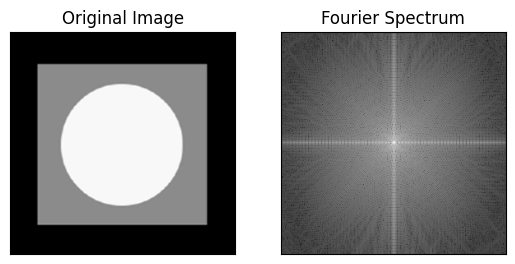

In [32]:

image = cv2.imread(path_circle, cv2.IMREAD_GRAYSCALE)


f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)


magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))


plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

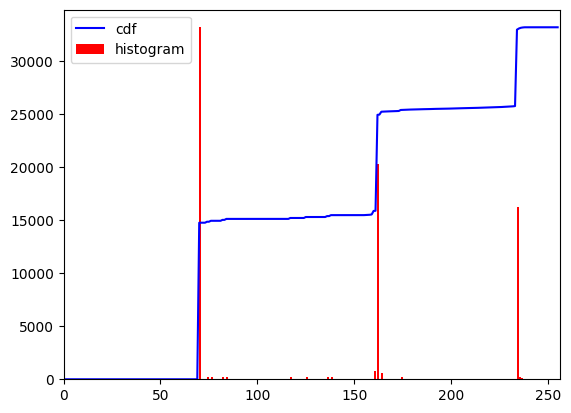

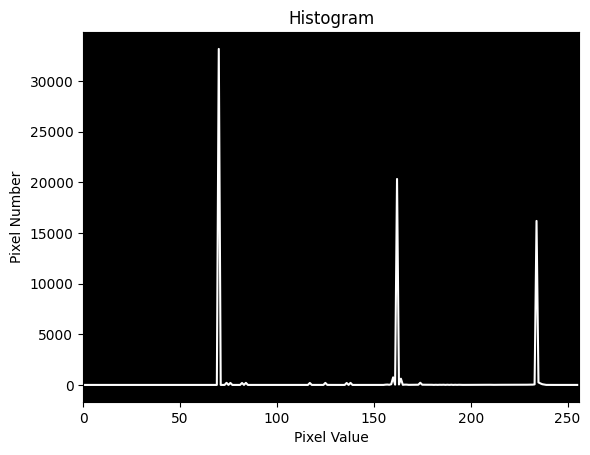

In [33]:

path_gauss='images/gauss_noisy.jpg'
image = cv2.imread(path_circle, cv2.IMREAD_GRAYSCALE)


hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()



plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

fig, ax = plt.subplots()
ax.plot(hist, color="white")
ax.set_facecolor((0, 0, 0))
ax.set_xlim([0, 256])


plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Number')


plt.show()